Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '01/05/2019' '09/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '01/06/2019' '18/04/2019'
 '09/05/2019' '24/04/2019' '03/03/2019' '15/04/2019' '12/06/2019'
 '06/03/2019' '21/03/2019' '03/04/2019' '06/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '06/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '03/06/2019' '15/03/2019' '03/05/2019' '09/03/2019'
 '06/06/2019' '24/05/2019' '01/04/2019' '21/04/2019' '21/06/2019'
 '27/03/2019' '18/03/2019' '12/04/2019' '09/04/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR' 'BLR ? NAG ? DEL' 'CCU ? BLR' 'BLR 

,Airline,Source,Destination,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,24,03,2019,22,20,1,10,3897
1,1,3,0,01,05,2019,5,50,13,15,7662
2,4,2,1,09,06,2019,9,25,4,25,13882
3,3,3,0,12,05,2019,18,5,23,30,6218
4,3,0,5,01,03,2019,16,50,21,35,13302


<Figure size 2000x4500 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

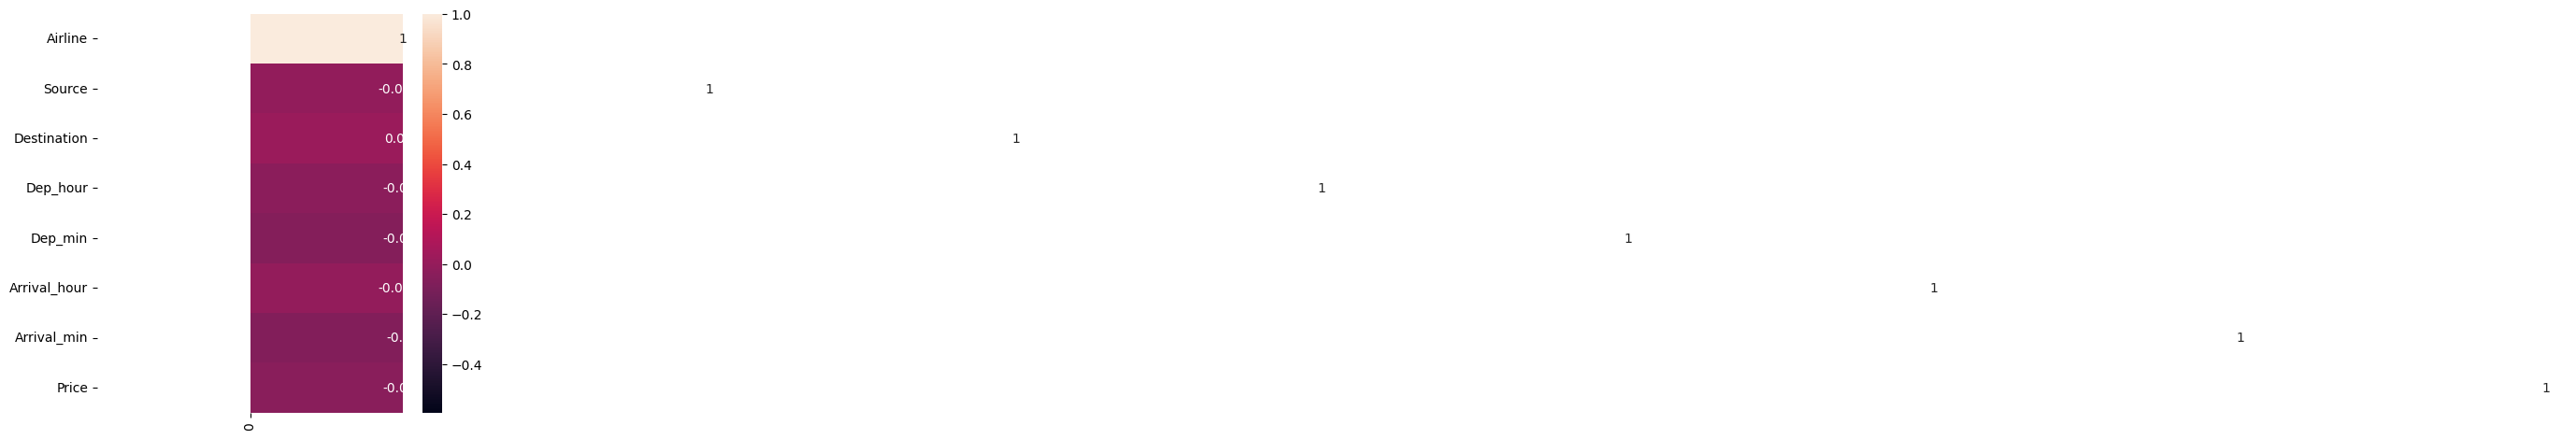

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as nm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import labelEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor  
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy import stats
import warnings
import pickle
warnings.filterwarnings('ignore')

#Read the Dataset
data=pd.read_csv("/content/drive/MyDrive/Data_train.csv")
data.head()

for i in data:
  print(i,data[i].unique())
#Checking value in Destination
data['Destination'].value_counts()
data.info()
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey
#Treating the Data Column
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]
data.head()
data.Total_Stops.unique()
data.Route=data.Route.str.split('->')
data.Route
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data.head()
#data.dropna(inplace=True)
#data.isnull().sum()
#In the similar manner, we split the Dep_time column, and create separate columns for departure hours and minutes
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data.drop('Dep_Time',axis=1,inplace=True)

data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop('Arrival_Time',axis=1,inplace=True)
data.head()

data.Duration=data.Duration.str.split('')
data['Travel_Hours']=data.Duration.str[1]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[0]
data['Travel_Mins']=data.Travel_Mins.str.split('m')
data['Travel_Mins']=data.Travel_Mins.str[1]
data.head()
data.Additional_Info.unique()
data.isnull().sum()
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_Date','Arrivel_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']
data.head()
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.Additional_Info=le.fit(data.Additional_Info)
data.head(10)
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Price']]
data.head()
#2ND STEP COMPLETED
#Descriptive Stastical
data.describe()
#Visual Analysis
c=1
plt.figure(figsize=(20,45))
categorical=['Airline','Source','Destination','Additional_Info']
#for i in categorical:
 # plt.subplot(6,3,c)
  #sns.countplot(x=data[i])
  #plt.xticks(rotation=90)
  #plt.tight_layout(pad=3.0)
  #c=c+1
#plt.show()
#Displot function in Price column
plt.figure(figsize=(15,8))
sns.displot(data.Price)
#Correlation using HeatMap
sns.heatmap(data.corr(),annot=True)
#detecting the outlies
sns.boxplot(data['Price'])
y=data['Price']
x=data.drop(columns=['Price'],axis=1)
#scalling the data
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

#Split Train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()
#COMPLETED
#using ensembele techniques

rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

for i in[rf,gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.2:
    print(i)
    print("R2 Score is->",r2_score(y_test,y_pred))
    print("R2 for train Data->",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is->",mean_absolute_error(y_pred,y_test))
    print("MEan Squared Error is->",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is->",(mean_squared_error(y_pred,y_test,squared=False)))


#KNN and Svm
knn=KNeighborsClassifier()
svm=SVR()
dt=DecisionTreeRegressor()
for i in[knn,svm,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)
    print("R2 Score is->",r2_score(y_test,y_pred))
    print("R2 for train Data->",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is->",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is->",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is->",(mean_squared_error(y_pred,y_test,squared=False)))

#from sklearn.model_selection import cross_val_score
#for i in range(2,5):
 # cv=cross_val_score(rf,x,y,cv=i)
  #print(rf,cv.mean())
#Accuracy
rf=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)
print("Test Accuracy",r2_score(y_train_pred,y_train))
print("Train Accuracy",r2_score(y_test_pred,y_test))

knn=KNeighborsClassifier(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=1)
knn.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)
print("Test Accuracy",r2_score(y_train_pred,y_train))
print("Train Accuracy",r2_score(y_test_pred,y_test))
#Evaluating the perfoermance
#price_list=pd.DataFrame({'Price':data})
#price_list
#Save the model
pickle.dump(rf,open('model1.pkl','wb'))
#COMPLETED
data.head()

In [ ]:
data.Total_Stops.unique()

AttributeError: ignored

In [ ]:
#scalling the data
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,-0.413142,-1.657964,2.421216,1.237154,-1.468868,0.0,1.660471,-0.234232,-1.798676,-0.889296
1,-1.263757,0.893018,-0.975021,-1.471757,0.249135,0.0,-1.300192,1.365738,-0.048712,-0.586814
2,0.012165,0.042691,-0.295774,-0.529527,1.108137,0.0,-0.603565,0.032429,-1.361185,0.018151
3,-0.413142,0.893018,-0.975021,-0.176191,0.249135,0.0,0.963844,-1.034218,1.409591,0.320633
4,-0.413142,-1.657964,2.421216,-1.471757,-1.468868,0.0,0.615531,1.365738,1.117931,0.623115


In [ ]:
#Split Train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
1023,4,0,2,12,05,2019,8,20,11,20
263,3,2,1,09,03,2019,4,55,16,10
6235,4,2,1,03,06,2019,19,45,19,0
4049,1,2,1,27,05,2019,3,50,19,15
8451,4,0,5,01,03,2019,22,50,5,5


In [ ]:
#MILESTONE    4
#Building the Model
#using ensembele techniques
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

for i in[rf,gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.2:
    print(i)
  
    print("R2 Score is->",r2_score(y_test,y_pred))
    print("R2 for train Data->",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is->",mean_absolute_error(y_pred,y_test))
    print("MEan Squared Error is->",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is->",(mean_squared_error(y_pred,y_test,squared=False)))


GradientBoostingRegressor()
R2 Score is-> 0.6962464685140564
R2 for train Data-> 0.7506500526743249
Mean Absolute Error is-> 1764.36293515023
MEan Squared Error is-> 6671407.67705831
Root Mean Squared Error is-> 2582.90682701841
AdaBoostRegressor()
R2 Score is-> 0.36337321658388244
R2 for train Data-> 0.3889853383076247
Mean Absolute Error is-> 3032.594404315625
MEan Squared Error is-> 13982378.376067594
Root Mean Squared Error is-> 3739.3018567732124


In [ ]:
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Price']]
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,24,03,2019,22,20,1,10,3897
1,1,3,0,01,05,2019,5,50,13,15,7662
2,4,2,1,09,06,2019,9,25,4,25,13882
3,3,3,0,12,05,2019,18,5,23,30,6218
4,3,0,5,01,03,2019,16,50,21,35,13302


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)

data.Total_Stops=le.fit_transform(data.Total_Stops)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

AttributeError: ignored

In [ ]:
data.Duration=data.Duration.str.split('')
data['Travel_Hours']=data.Duration.str[1]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[0]
data['Travel_Mins']=data.Travel_Mins.str.split('m')
data['Travel_Mins']=data.Travel_Mins.str[1]
data.head()

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Price']]
data.head()

KeyError: ignored

In [ ]:
#Regression Model
#KNN and Svm
knn=KNeighborsClassifier()
svm=SVR()
dt=DecisionTreeRegressor()
for i in[knn,svm,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)
    print("R2 Score is->",r2_score(y_test,y_pred))
    print("R2 for train Data->",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is->",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is->",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is->",(mean_squared_error(y_pred,y_test,squared=False)))

SVR()
R2 Score is-> -0.024847225947665974
R2 for train Data-> -0.024178300394269492
Mean Absolute Error is-> 3667.6124125047313
Mean Squared Error is-> 22508951.970211305
Root Mean Squared Error is-> 4744.360016926551


In [ ]:
#Checking cross validaation
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(rf,x,y,cv=i)
  print(rf,cv.mean())

RandomForestClassifier(n_estimators=10) 0.36313594718943787
RandomForestClassifier(n_estimators=10) 0.36853685368536854
RandomForestClassifier(n_estimators=10) 0.36473505402160866


In [ ]:

#Accuracy
rf=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)
print("Test Accuracy",r2_score(y_train_pred,y_train))
print("Train Accuracy",r2_score(y_test_pred,y_test))

Test Accuracy 0.9343220194838787
Train Accuracy 0.6824694229574373


In [ ]:
knn=KNeighborsClassifier(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=1)
knn.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)
print("Test Accuracy",r2_score(y_train_pred,y_train))
print("Train Accuracy",r2_score(y_test_pred,y_test))

Test Accuracy 0.9343220194838787
Train Accuracy 0.6824694229574373


In [ ]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,3,0,5,24,03,2019,22,20,1,10,3897
1,1,3,0,01,05,2019,5,50,13,15,7662
2,4,2,1,09,06,2019,9,25,4,25,13882
3,3,3,0,12,05,2019,18,5,23,30,6218
4,3,0,5,01,03,2019,16,50,21,35,13302


In [ ]:
# MILESTONE  6
#Model Deployement
# Save the best model

import pickle
pickle.dump(rfr,open("model1.pk1",'wb'))

In [ ]:
import numpy as np
from flask import Flask,request,jsonify,render_template
import pickle
app=Flask(__name__)
from tensorflow.keras.models import load_model
model=pickle.load(open("model1.pk1",'rb'))

In [ ]:
@app.route('/home')
def home():
  return render_template('home.html')

In [ ]:
@app.route('/predict')
def home1():
  return render_template('predict.html')
  


In [ ]:
@app.route('/pred',methods=['POST','GET'])
def pred():
  x=[[int(x for x in request.form.values())]]
  print(x)
  x=np.array(x)
  print(x)
  pred=model.predict(x)
  print(pred)
  return render_template('submit.html',prediction_text=pred)


In [ ]:
if__name__=="__main__":
  app.run(debug=False)


SyntaxError: ignored